# PyTorch CNN Model

## 0. Importing PyTorch Modules and setting up device

In [3]:
import torch
import torchvision
import helper_funcs as hlp
from torch import nn
from torchinfo import summary
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"

torch.__version__, device


('2.3.0+cu121', 'cuda')

## 1. Load Dataset

In [43]:
# Determine Image Size
IMAGE_X = 224
IMAGE_Y = 224
IMAGE_SIZE = (IMAGE_X, IMAGE_Y)

# Set Train and Test Directories
root_dir  = 'dataset_egp'
train_dir = root_dir + "/train"
test_dir  = root_dir + '/test'
val_dir = root_dir + '/validate'


# Define Image Transformer
simple_transform = transforms.Compose([transforms.Resize(size=IMAGE_SIZE), transforms.ToTensor()])

# Get Train and Test data
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)
class_names = train_data_simple.classes

train_data_simple, test_data_simple,class_names

(Dataset ImageFolder
     Number of datapoints: 2560
     Root location: drive/MyDrive/PyTorch/dataset_egp/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 600
     Root location: drive/MyDrive/PyTorch/dataset_egp/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 ['egp_10',
  'egp_100',
  'egp_10_new',
  'egp_20',
  'egp_200',
  'egp_20_new',
  'egp_5',
  'egp_50'])

## 2. Visualize Data

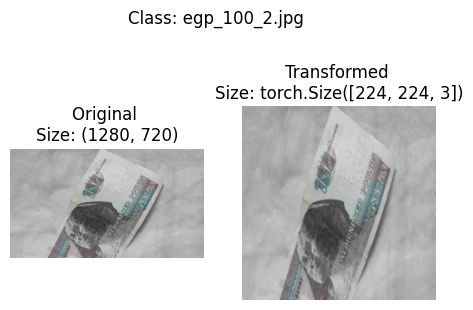

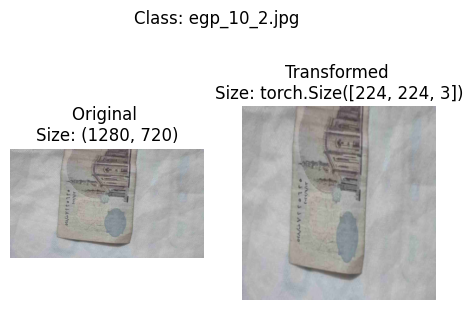

In [26]:
# Plot Images after transforming
hlp.plot_transformed_images(image_paths=root_dir, transform=simple_transform, n=2)

## 3. Group Data to batches

In [27]:
# Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = 2

# Create DataLoader
train_dataloader_simple = DataLoader(dataset=train_data_simple, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7d0eb03b7af0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d0eb807dba0>)

## 4. Design Model

In [36]:
IN_CHANNELS  = 3   # Color Channels
HIDDEN_UNITS = 10
OUTPUT_SHAPE = len(train_data_simple.classes)
SIMPLE_MODEL_PATH = 'simple_model.pth'


simple_model = nn.Sequential(
    nn.Conv2d(in_channels=IN_CHANNELS, out_channels=HIDDEN_UNITS, kernel_size=3, stride=1,  padding=1),
    nn.BatchNorm2d(HIDDEN_UNITS),
    nn.ReLU(),
    nn.Conv2d(in_channels=HIDDEN_UNITS, out_channels=HIDDEN_UNITS, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(HIDDEN_UNITS),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(HIDDEN_UNITS, HIDDEN_UNITS, kernel_size=3, padding=1),
    nn.BatchNorm2d(HIDDEN_UNITS),
    nn.ReLU(),
    nn.Conv2d(HIDDEN_UNITS, HIDDEN_UNITS, kernel_size=3, padding=1),
    nn.BatchNorm2d(HIDDEN_UNITS),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Dropout(0.5),
    nn.Flatten(),
    nn.Linear(in_features=HIDDEN_UNITS*56*56, out_features=OUTPUT_SHAPE)
).to(device)

try:
    simple_model.load_state_dict(torch.load(f=SIMPLE_MODEL_PATH))
except FileNotFoundError:
    pass

simple_model

Sequential(
  (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU()
  (10): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU()
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Dropout(p=0.5, inplace=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=31360, out_features

In [37]:
# Verify Model using torchinfo.summary
summary(simple_model, input_size=[1, 3, IMAGE_X, IMAGE_Y])

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 8]                    --
├─Conv2d: 1-1                            [1, 10, 224, 224]         280
├─BatchNorm2d: 1-2                       [1, 10, 224, 224]         20
├─ReLU: 1-3                              [1, 10, 224, 224]         --
├─Conv2d: 1-4                            [1, 10, 224, 224]         910
├─BatchNorm2d: 1-5                       [1, 10, 224, 224]         20
├─ReLU: 1-6                              [1, 10, 224, 224]         --
├─MaxPool2d: 1-7                         [1, 10, 112, 112]         --
├─Conv2d: 1-8                            [1, 10, 112, 112]         910
├─BatchNorm2d: 1-9                       [1, 10, 112, 112]         20
├─ReLU: 1-10                             [1, 10, 112, 112]         --
├─Conv2d: 1-11                           [1, 10, 112, 112]         910
├─BatchNorm2d: 1-12                      [1, 10, 112, 112]         20
├─ReLU: 1-1

## 5. Train Model

In [38]:
# Number of epochs
NUM_EPOCHS = 10

# Setup loss function and optimizer
loss_fn_simple   = nn.CrossEntropyLoss()
optimizer_simple = torch.optim.Adam(params=simple_model.parameters(), lr=0.001)

simple_model_results = hlp.train_model(model=simple_model, train_dataloader=train_dataloader_simple, test_dataloader=test_dataloader_simple,
                                       optimizer=optimizer_simple, loss_fn=loss_fn_simple, epochs=NUM_EPOCHS, device=device)

# Save Model
torch.save(obj=simple_model.state_dict(),f=SIMPLE_MODEL_PATH)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 5.3837 | train_acc: 0.2051 | test_loss: 2.2739 | test_acc: 0.2621
Epoch: 2 | train_loss: 2.0492 | train_acc: 0.3656 | test_loss: 2.3284 | test_acc: 0.3218
Epoch: 3 | train_loss: 1.5958 | train_acc: 0.4922 | test_loss: 2.4415 | test_acc: 0.3350
Epoch: 4 | train_loss: 1.2565 | train_acc: 0.5902 | test_loss: 1.8023 | test_acc: 0.4189
Epoch: 5 | train_loss: 1.1628 | train_acc: 0.6262 | test_loss: 1.8230 | test_acc: 0.4474
Epoch: 6 | train_loss: 0.8563 | train_acc: 0.7043 | test_loss: 2.0473 | test_acc: 0.4781
Epoch: 7 | train_loss: 0.6386 | train_acc: 0.7937 | test_loss: 3.2676 | test_acc: 0.3624
Epoch: 8 | train_loss: 0.6108 | train_acc: 0.7961 | test_loss: 1.9021 | test_acc: 0.5044
Epoch: 9 | train_loss: 0.4252 | train_acc: 0.8555 | test_loss: 2.1566 | test_acc: 0.4616
Epoch: 10 | train_loss: 0.3428 | train_acc: 0.8867 | test_loss: 3.7000 | test_acc: 0.3492


## 6. Evaluate Model

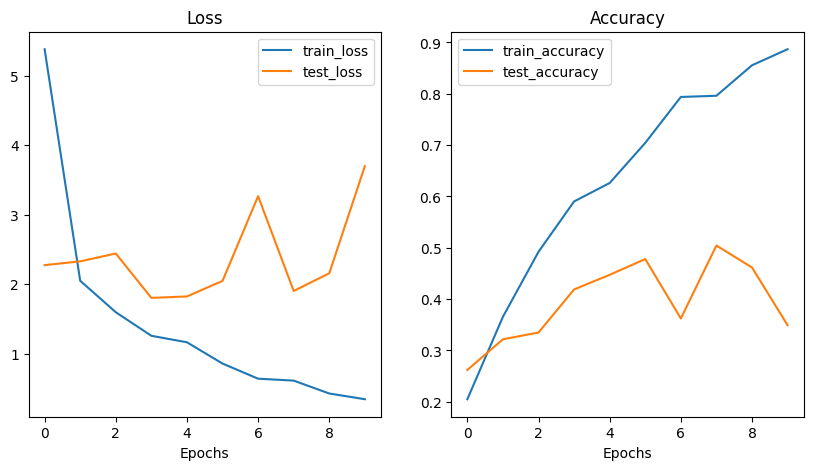

In [39]:
hlp.plot_loss_curves(simple_model_results)

## 7. Predict using custom data

Predicting for image: drive/MyDrive/PyTorch/dataset_egp/validate/egp_50_3.jpg


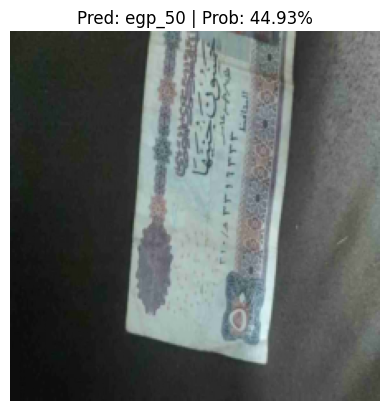

Predicting for image: drive/MyDrive/PyTorch/dataset_egp/validate/egp_20_new_4.jpg


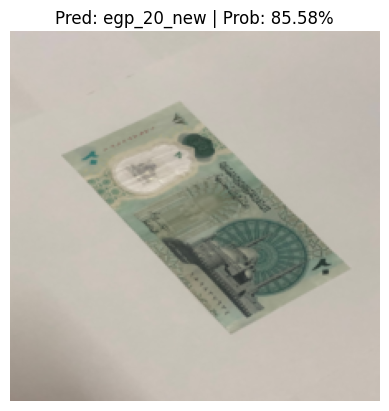

In [54]:
custom_image_transform = transforms.Compose([transforms.Resize(IMAGE_SIZE),])

hlp.pred_and_plot_images(model=simple_model, image_dir=val_dir, class_names=class_names,
                         transform=custom_image_transform, device=device,num_images=2)

### -----> The model is clearly overfitting

## 8. Trying a pretrained model

In [44]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
auto_transforms = weights.transforms()

# Get Train and Test data
train_data = datasets.ImageFolder(root=train_dir, transform=auto_transforms)
test_data = datasets.ImageFolder(root=test_dir, transform=auto_transforms)

# Turn images into DataLoaders
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=NUM_WORKERS, pin_memory=True)
test_dataloader  = DataLoader(test_data , batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

auto_transforms, train_dataloader, test_dataloader

(ImageClassification(
     crop_size=[224]
     resize_size=[256]
     mean=[0.485, 0.456, 0.406]
     std=[0.229, 0.224, 0.225]
     interpolation=InterpolationMode.BICUBIC
 ),
 <torch.utils.data.dataloader.DataLoader at 0x7d0ebde4fa60>)

In [45]:
TRAINED_MODEL_PATH = 'trained_model.pth'

trained_model = torchvision.models.efficientnet_b0(weights=weights).to(device)

for param in trained_model.features.parameters():
  param.requires_grad = False

trained_model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=len(class_names))
    ).to(device)

try:
    trained_model.load_state_dict(torch.load(f=TRAINED_MODEL_PATH))
except FileNotFoundError:
    pass

trained_model

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 167MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [46]:
summary(model=trained_model,input_size=(1, 3, 224, 224), col_names=["input_size", "output_size", "num_params", "trainable"], col_width=20, row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 8]               --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

In [47]:
# Number of epochs
NUM_EPOCHS = 10

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=trained_model.parameters(), lr=0.001)

trained_model_results = hlp.train_model(model=trained_model, train_dataloader=train_dataloader, test_dataloader=test_dataloader,
                                       optimizer=optimizer, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

# Save Model
torch.save(obj=trained_model.state_dict(),f=TRAINED_MODEL_PATH)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4667 | train_acc: 0.6316 | test_loss: 0.9149 | test_acc: 0.8799
Epoch: 2 | train_loss: 0.8136 | train_acc: 0.8523 | test_loss: 0.6047 | test_acc: 0.9068
Epoch: 3 | train_loss: 0.5913 | train_acc: 0.8855 | test_loss: 0.4607 | test_acc: 0.9221
Epoch: 4 | train_loss: 0.4702 | train_acc: 0.9062 | test_loss: 0.4024 | test_acc: 0.9271
Epoch: 5 | train_loss: 0.3968 | train_acc: 0.9121 | test_loss: 0.3458 | test_acc: 0.9380
Epoch: 6 | train_loss: 0.3624 | train_acc: 0.9250 | test_loss: 0.2973 | test_acc: 0.9479
Epoch: 7 | train_loss: 0.3263 | train_acc: 0.9340 | test_loss: 0.2843 | test_acc: 0.9441
Epoch: 8 | train_loss: 0.2860 | train_acc: 0.9441 | test_loss: 0.2576 | test_acc: 0.9490
Epoch: 9 | train_loss: 0.2703 | train_acc: 0.9414 | test_loss: 0.2327 | test_acc: 0.9518
Epoch: 10 | train_loss: 0.2622 | train_acc: 0.9402 | test_loss: 0.2208 | test_acc: 0.9545


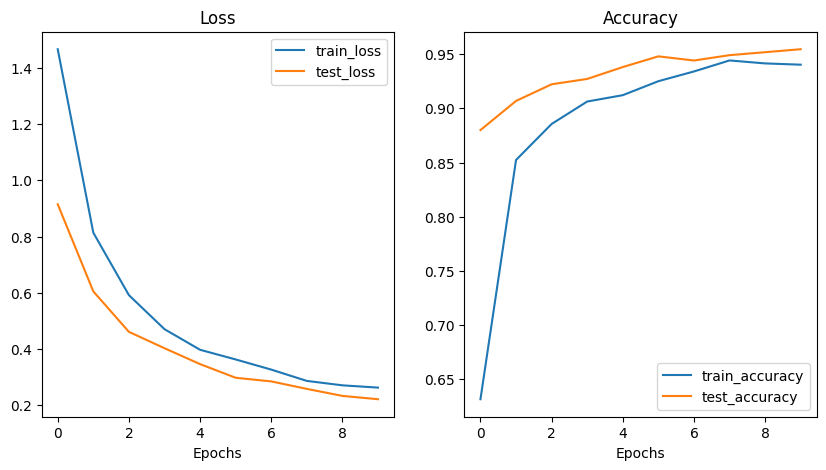

In [48]:
hlp.plot_loss_curves(trained_model_results)

Predicting for image: drive/MyDrive/PyTorch/dataset_egp/validate/egp_20_3.jpg


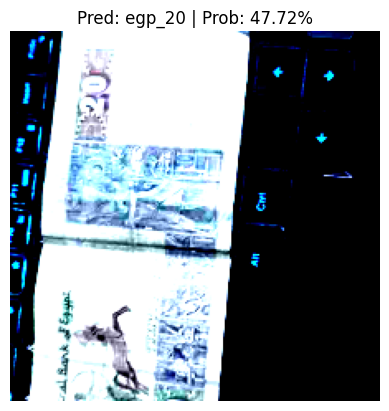

Predicting for image: drive/MyDrive/PyTorch/dataset_egp/validate/egp_20_new_3.jpg


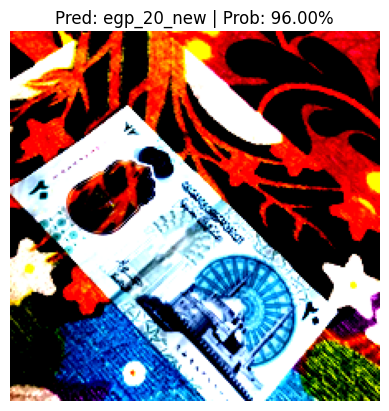

Predicting for image: drive/MyDrive/PyTorch/dataset_egp/validate/egp_50_0.jpg


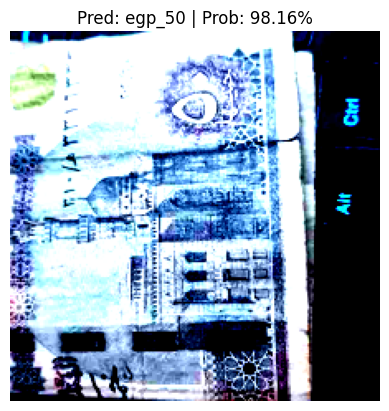

In [55]:
hlp.pred_and_plot_images(model=trained_model, image_dir=val_dir, class_names=class_names,
                         transform=auto_transforms, device=device,num_images=3)